In [1]:
import numpy as np

training_data = np.loadtxt('./mnist_train.csv', delimiter = ',', dtype = np.float32)
test_data = np.loadtxt('./mnist_test.csv', delimiter = ',', dtype = np.float32)

print("training_data.shape = ", training_data.shape, ", test_data.shape = ", test_data.shape)

training_data.shape =  (60000, 785) , test_data.shape =  (10000, 785)


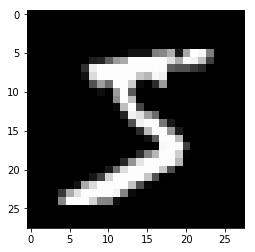

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

img = training_data[0, 1:].reshape(28,28)

plt.imshow(img, cmap='gray')
plt.show()

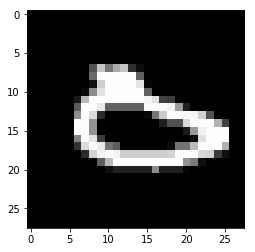

In [3]:
img = test_data[717,1:].reshape(28,28)

plt.imshow(img, cmap='gray')
plt.show()

8.0


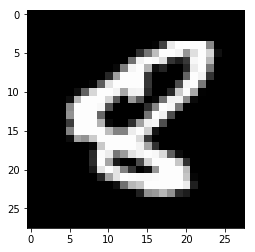

In [4]:
img = test_data[1325,1:].reshape(28,28)
print(test_data[1325,0])
plt.imshow(img, cmap='gray')
plt.show()

In [5]:
A = np.array([-1,0,3,4,-2])
B = np.max(A)
C = np.argmax(A)
print(A)
print(B)
print(C)

[-1  0  3  4 -2]
4
3


In [6]:
import numpy as np
from datetime import datetime

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def numerical_derivative(f, x):
    delta_x = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx = it.multi_index        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x) # f(x+delta_x)
        
        x[idx] = tmp_val - delta_x 
        fx2 = f(x) # f(x-delta_x)
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val 
        it.iternext()   
        
    return grad

In [7]:
import numpy as np
import random

class MNIST_Test:
    def __init__(self,i_nodes,h_nodes,o_nodes,learning_rate):
        self.i_nodes = i_nodes
        self.h_nodes = h_nodes
        self.o_nodes = o_nodes
        self.learning_rate = learning_rate
        
        self.W2 = np.random.rand(i_nodes, h_nodes) / np.sqrt(self.i_nodes/2)
        self.b2 = np.random.rand(h_nodes)
        
        self.W3 = np.random.rand(h_nodes, o_nodes) / np.sqrt(self.h_nodes/2)
        self.b3 = np.random.rand(o_nodes)
        
    def feed_forward(self):
        delta = 1e-7
        Z2 = np.dot(self.input_data, self.W2) + self.b2
        a2 = sigmoid(Z2)
        
        Z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(Z3)
        
        return -np.sum( self.target_data * np.log(y + delta) + (1-self.target_data) * np.log(1- y + delta))
    
    def loss_func(self):
        delta = 1e-7
        Z2 = np.dot(self.input_data, self.W2) + self.b2
        a2 = sigmoid(Z2)
        
        Z3 = np.dot(a2, self.W3) + self.b3
        y = a3 = sigmoid(Z3)
        
        return -np.sum( self.target_data * np.log(y + delta) + (1-self.target_data) * np.log(1- y + delta))
    
    def predict(self, input_data):
        Z2 = np.dot(input_data, self.W2) + self.b2
        a2 = np.sigmoid(Z2)
        
        Z3 = np.dot(a2,self.W3) + self.b3
        y = a3 = sigmoid(Z3)
        
        predic_num = np.argmax(y)
        
        return predic_num
    
    def accuracy(self, test_data):
        matched_list = []
        not_matched_list = []
        
        for index in range(len(test_data)):
            label = int(test_data[index, 0])
            
            data = (test_data[index,1:]/255.0 * 0.99) + 0.01
            
            predicted_num = self.predict(np.array(data, ndmin = 2))
            
            if label == predicted_num:
                matched_list.append(index)
            else:
                not_matched_list.append(index)
        
        print("Current Accuracy = ", 100 * (len(matched_list) / len(test_data)), " %" )
        
        return matched_list, not_matched_list
    
    def train(self, input_data, target_data):
        
        self.input_data = input_data
        self.target_data = target_data
        
        f = lambda x : self.feed_forward()
        
        self.W2 = self.W2 - self.learning_rate * numerical_derivative(f,self.W2)
        self.b2 = self.b2 - self.learning_rate * numerical_derivative(f,self.b2)
        
        self.W3 = self.W3 - self.learning_rate * numerical_derivative(f,self.W3)
        self.b3 = self.b3 - self.learning_rate * numerical_derivative(f,self.b3)
              

In [8]:
i_nodes = training_data.shape[1] - 1
h_nodes = 1
o_nodes = 10
lr = 1e-1
epochs = 1

obj = MNIST_Test(i_nodes, h_nodes, o_nodes, lr)

start_time = datetime.now()

for step in range(epochs):
    for index in range(len(training_data)):

        input_data = ((training_data[index, 1:] / 255.0) * 0.99) + 0.01
        target_data = np.zeros(o_nodes) + 0.01
        target_data[int(training_data[index, 0])] = 0.99

        obj.train(np.array(input_data,ndmin = 2) , np.array(target_data, ndmin = 2) )
        
        if index % 200 == 0:
            print("epochs = ", step, "loss value = ", obj.loss_func())
    
end_time = datetime.now()

print("")
print("Elapsed time =>", end_time - start_time)

epochs =  0 loss value =  30.55516014478044
epochs =  0 loss value =  5.24444836835868
epochs =  0 loss value =  4.96154282041723
epochs =  0 loss value =  4.869081167969301
epochs =  0 loss value =  4.824638943276601
epochs =  0 loss value =  4.798752463389307
epochs =  0 loss value =  4.780010196388308
epochs =  0 loss value =  4.767673600045364
epochs =  0 loss value =  4.759580256785202
epochs =  0 loss value =  4.752238139945351
epochs =  0 loss value =  4.746751950258877
epochs =  0 loss value =  4.741843203337765
epochs =  0 loss value =  4.738149132689294
epochs =  0 loss value =  4.734621268827715
epochs =  0 loss value =  4.7316532613880256
epochs =  0 loss value =  4.729414110441082
epochs =  0 loss value =  4.7272158092640435
epochs =  0 loss value =  4.7253779628345285
epochs =  0 loss value =  4.723843053003406
epochs =  0 loss value =  4.72198718968113
epochs =  0 loss value =  4.720693749576875
epochs =  0 loss value =  4.719508309304774
epochs =  0 loss value =  4.7185

epochs =  0 loss value =  4.698287139255615
epochs =  0 loss value =  4.698280679255218
epochs =  0 loss value =  4.69826564034931
epochs =  0 loss value =  4.69825269500575
epochs =  0 loss value =  4.69823559240803
epochs =  0 loss value =  4.698221589142833
epochs =  0 loss value =  4.698203864046139
epochs =  0 loss value =  4.698194810713127
epochs =  0 loss value =  4.69817920662192
epochs =  0 loss value =  4.698165639074918
epochs =  0 loss value =  4.698167998965467
epochs =  0 loss value =  4.698143228670701
epochs =  0 loss value =  4.698130385401142
epochs =  0 loss value =  4.6981094836547825
epochs =  0 loss value =  4.698107950325139
epochs =  0 loss value =  4.698092706340744
epochs =  0 loss value =  4.698089812733764
epochs =  0 loss value =  4.698065938554916
epochs =  0 loss value =  4.698068129713094
epochs =  0 loss value =  4.698047273710433
epochs =  0 loss value =  4.698030029234151
epochs =  0 loss value =  4.697999369074673
epochs =  0 loss value =  4.6980098

KeyboardInterrupt: 

In [ ]:
test_input_data = test_data[ :, 1:]
test_target_data = test_data[ :, 0 ]

(true_list1, false_list_1 ) = obj.accuracy(test_input_data, test_target_data)

In [ ]:
# 손실함수 추세 확인
Y_DATA_LIST = []

for index in range(0, len(loss_val_list), 500):
    Y_DATA_LIST.append(loss_val_list[index])
    
plt.title('MNIST Loss Value Trend')
plt.xlabel('data index ( X 500 )')
plt.ylabel('loss value')
plt.grid()
plt.ylim(2.1, 7.1)
plt.plot(Y_DATA_LIST, color='b')
plt.show()

In [ ]:
# 손실함수 추세 확인
Y_DATA_LIST = []

for index in range(0, len(loss_val_list), 200):
    Y_DATA_LIST.append(loss_val_list[index])
    
plt.title('MNIST Loss Value Trend')
plt.xlabel('data index ( X 200 )')
plt.ylabel('loss value')
plt.grid()
plt.ylim(2.1, 7.1)
plt.plot(Y_DATA_LIST, color='b')
plt.show()

In [ ]:
# 손실함수 추세 확인
Y_DATA_LIST = []

for index in range(0, len(loss_val_list), 100):
    Y_DATA_LIST.append(loss_val_list[index])
    
plt.title('MNIST Loss Value Trend')
plt.xlabel('data index ( X 100 )')
plt.ylabel('loss value')
plt.grid()
plt.ylim(2.1, 7.1)
plt.plot(Y_DATA_LIST, color='b')
plt.show()